# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

---
## Exercise 5.9


<img src="figures/homework-04/exercise-5.9.png" width="600" />


In [2]:
x1, x2 = sy.symbols('x1, x2', real=True)

f1 = x1**2 - x2**2 - 12
f2 = 2 * x1 * x2 - 16

sy.nonlinsolve([f1, f2], [x1, x2])

We see that the $f_1$ and $f_2$ intersect at points $(-4, -2)$ and $(4, 2)$

Text(0.5,1,'Sketch of the level sets and intersection points')

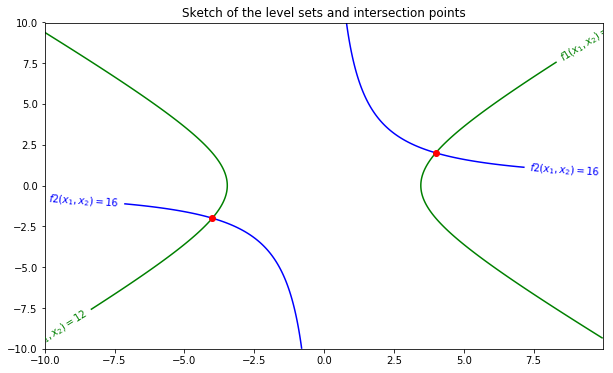

In [3]:
delta = 0.025
x1 = np.arange(-10.0, 10.0, delta)
x2 = np.arange(-10.0, 10.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z1 = X1**2 - X2**2
Z2 = 2 * X1 * X2

fig, ax = plt.subplots(figsize=(10,6))
conourSet1 = ax.contour(X1, X2, Z1, [12], colors='green')
conourSet2 = ax.contour(X1, X2, Z2, [16], colors='blue')
ax.clabel(conourSet1, inline=1, fontsize=10, colors='green', fmt='$f1(x_1,x_2)=12$')
ax.clabel(conourSet2, inline=1, fontsize=10, colors='blue', fmt='$f2(x_1,x_2)=16$')
ax.plot(4, 2, 'ro')
ax.plot(-4, -2, 'ro')

ax.set_title('Sketch of the level sets and intersection points')

---
## Exercise 5.10a and 5.10b

<img src="figures/homework-04/exercise-5.10.png" width="600" />


Taylor series in one dimension.

\begin{align*}
f \left( x \right) & = \sum\limits_{n = 0}^\infty {\frac{{{f^{\left( n \right)}}\left( x_0 \right)}}{{n!}}{{\left( {x - x_0} \right)}^n}} \\ & = f\left( x_0 \right) + f'\left( x_0 \right)\left( {x - x_0} \right) + \frac{{f''\left( x_0 \right)}}{{2!}}{\left( {x - x_0} \right)^2} + \frac{{f'''\left( x_0 \right)}}{{3!}}{\left( {x - x_0} \right)^3} + \cdots \end{align*}

Multivariable Taylor series:

\begin{align*}
   f(x) \approx f(x_0) + Df(x_0) (x-x_0)
   +  \frac{1}{2} (x-x_0)^T D^2 f(x_0) (x-x_0)
   + \dots
\end{align*}

How to solve it in MatLAB:

```
syms x1 x2;
f = x1 * exp(-x2) + x2 + 1;
taylor(f, [x1, x2], [1, 0], 'Order', 3)

ans =
 
x2^2/2 + (1 - x1)*x2 + x1 + 1
```

MatLAB produces:

In [4]:
x1, x2 = sy.symbols('x1, x2')
x2**2/2 + (1 - x1)*x2 + x1 + 1

Let us try to write the Taylor expansion by hand using the equation:

In [5]:
def taylor_manual(f, x, x0):
    # Compute the Jacobian and the Hessian
    F = sy.Matrix([f])
    F_jacobian = F.jacobian(x)
    F_hessian = F_jacobian.jacobian(x)

    # Turn expressions into lambda functions
    lb_F = sy.lambdify(x, F)
    lb_F_jacobian = sy.lambdify(x, F_jacobian)
    lb_F_hessian = sy.lambdify(x, F_hessian)

    # Compute the vector: x-x0
    x_minus_x0 = (np.array(x) - np.array(x0)).reshape(2, -1)

    # Compute f(x0)
    term1 = lb_F(*x0)

    # Compute dfdx(x0)*(x-x0)
    term2 = np.dot(lb_F_jacobian(*x0), x_minus_x0)

    # Compute p1 = 1/2*(x-x0)
    p1 = sy.Rational(1, 2) * x_minus_x0
    # Compute p2 = p1^T * Hessian(x0) * (x-x0)
    p2 = np.dot(p1.T, lb_F_hessian(*x0))
    # Compute term3 = p2 * (x-x0)
    term3 = np.dot(p2, x_minus_x0)

    result = (term1 + term2 + term3)[0][0]
    # Simplify the sum of all the terms
    simplified_result = sy.simplify(term1 + term2 + term3)[0]
    return simplified_result

In [6]:
x1, x2 = sy.symbols('x1, x2', real=True)
f = x1 * sy.exp(-x2) + x2 + 1

taylor_manual(f, (x1, x2), (1, 0))

Let us compute b) 

<img src="figures/homework-04/exercise-5.10.png" width="600" />


In [7]:
x1, x2 = sy.symbols('x1, x2', real=True)
f = x1**4 +  2 * x1**2 * x2**2 + x2**4
taylor_manual(f, (x1, x2), (1, 1))

---
## Exercise 6.3

<img src="figures/homework-04/exercise-6.3.png" width="600" />


---
## Exercise 6.8

<img src="figures/homework-04/exercise-6.8.png" width="400" />


<img src="figures/homework-04/exercise-6.8-a.png" width="600" />


In [8]:
def get_func(x, A, b, term3):
    x_vec = np.array(x).reshape(2, -1)
    tmp = np.dot(x_vec.T, np.array(A))
    term1 = np.dot(tmp, x_vec)
    term2 = np.dot(x_vec.T, np.array(b).reshape(2, -1))
    result = term1 + term2 + term3
    return sy.Matrix(result)

In [9]:
x1, x2 = sy.symbols('x1, x2', real=True)
x = (x1, x2)
A = [[1, 2],
     [4, 7]]
b = [3, 5]
c = 6

F = get_func(x, A, b, c)
F

[x₁⋅(x₁ + 4⋅x₂) + 3⋅x₁ + x₂⋅(2⋅x₁ + 7⋅x₂) + 5⋅x₂ + 6]

In [10]:
F_jacobian = F.jacobian(x)
F_jacobian

[2⋅x₁ + 6⋅x₂ + 3  6⋅x₁ + 14⋅x₂ + 5]

In [11]:
# Evaluate the Jacobian (gradient) at point [1, 1]
F_jacobian.subs({x1: 1, x2: 1})

[11  25]

In [12]:
# Compute the Hessian
F_hessian = F_jacobian.jacobian((x1, x2))
F_hessian

⎡2  6 ⎤
⎢     ⎥
⎣6  14⎦

---

<img src="figures/homework-04/exercise-6.8-b.png" width="600" />


The directional derivative of a function $f$ in the direction of the vector $d$ is given:

\begin{equation}
\frac{\partial f}{\partial d}(x) = Df(x)^T d
\end{equation}

This basically says that the directional derivative is the dot product between the Jacobian and the vector $d$. If $d$ is a unit vector i.e. the $||d||=1$ then the dot product $Df(x)^T d$ is the **rate of increase** of $f$ at the point $x$ in the direction $d$.

In [14]:
gradient_at_point = sy.lambdify((x1, x2), F_jacobian)(1, 1)
unit_vector = gradient_at_point / np.linalg.norm(gradient_at_point)
np.dot(gradient_at_point, unit_vector.T)

array([[27.31300057]])

---
<img src="figures/homework-04/exercise-6.8-c.png" width="600" />


---
## Exercise 6.10

<img src="figures/homework-04/exercise-6.10.png" width="600" />


---
<img src="figures/homework-04/exercise-6.10-a.png" width="600" />


---
<img src="figures/homework-04/exercise-6.10-b.png" width="600" />


---
## Exercise 6.11

---
## Exercise 6.20

---
## Exercise 6.23